In [19]:
import matplotlib.pyplot as plt

In [20]:
def levenshtein_distance(s1, s2):
    """
    Calculate the Levenshtein distance between two strings.
    """
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for index2, char2 in enumerate(s2):
        new_distances = [index2 + 1]
        for index1, char1 in enumerate(s1):
            if char1 == char2:
                new_distances.append(distances[index1])
            else:
                new_distances.append(1 + min((distances[index1], distances[index1 + 1], new_distances[-1])))
        distances = new_distances

    return distances[-1]

In [21]:
def similarity_percentage(s1, s2):
    """
    Calculate the similarity percentage based on Levenshtein distance.
    """
    max_len = max(len(s1), len(s2))
    if max_len == 0:
        return 100.0  # Both strings are empty
    lev_distance = levenshtein_distance(s1, s2)
    return (1 - lev_distance / max_len) * 100

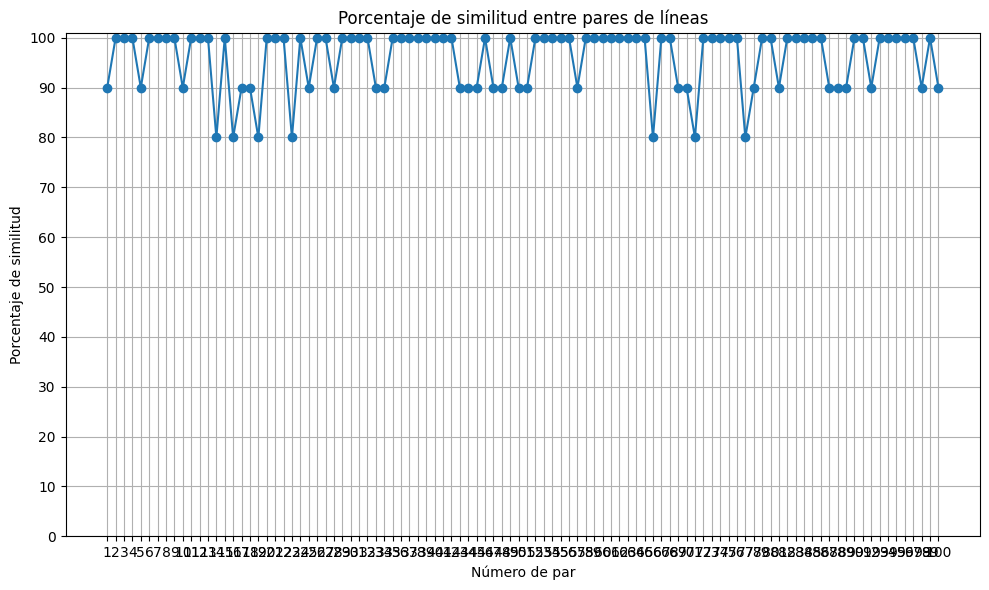

In [22]:
def plot_similarity(similarity_percentages):
    """
    Plot the similarity percentages.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(similarity_percentages) + 1), similarity_percentages, marker='o', linestyle='-')
    plt.title("Porcentaje de similitud entre pares de líneas")
    plt.xlabel("Número de par")
    plt.ylabel("Porcentaje de similitud")
    plt.grid(True)
    plt.xticks(range(1, len(similarity_percentages) + 1))
    plt.yticks(range(0, 110, 10))
    plt.tight_layout()
    plt.show()

# Main code
# Leer el archivo
with open("simulacion.txt", "r") as file:
    lines = file.readlines()

# Comparar la similitud entre pares de líneas consecutivas
similarity_percentages = [similarity_percentage(lines[i].strip(), lines[i + 1].strip()) for i in range(0, len(lines) - 1, 2)]

# Mostrar el gráfico
plot_similarity(similarity_percentages)